In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Loading and Importing the Seaborn and Default dataset**

In [2]:
import seaborn as sns 
sns.set(style="white")

#loading dataset as an example
mpg = sns.load_dataset("mpg")
print(type(mpg))


<class 'pandas.core.frame.DataFrame'>


In [3]:
import pandas as pd
mpg.head()
#print(mpg.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**1. Scatter Plot**

<Axes: xlabel='horsepower', ylabel='mpg'>

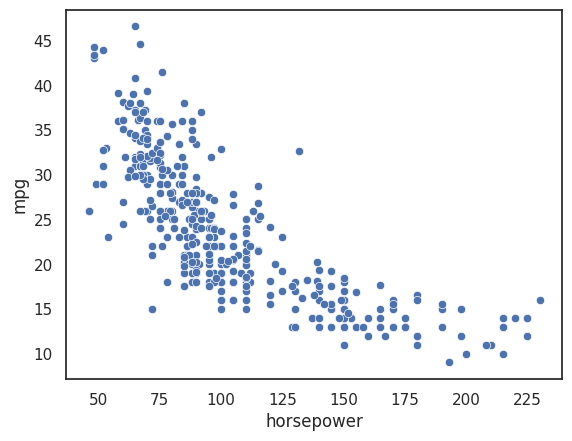

In [4]:
#Plot miles pr gallon against horsepower

sns.scatterplot(x = "horsepower",y = "mpg",data = mpg)


<Axes: xlabel='horsepower', ylabel='mpg'>

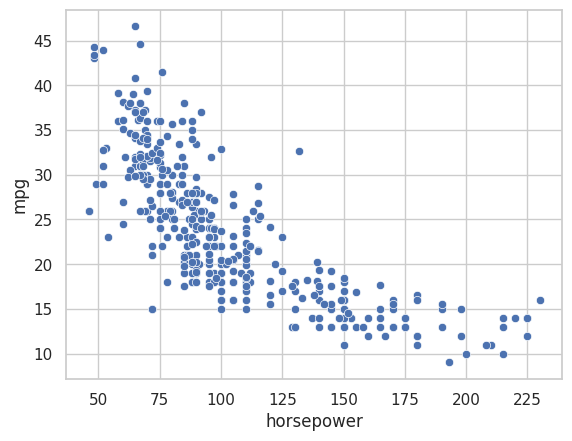

In [5]:
#GRID is very important for readability of the plot
#style={"white","whitegrid","dark","darkgrid","ticks"}

sns.set(style = "whitegrid")
sns.scatterplot(x = "horsepower",y = "mpg",data = mpg)


<Axes: xlabel='horsepower', ylabel='mpg'>

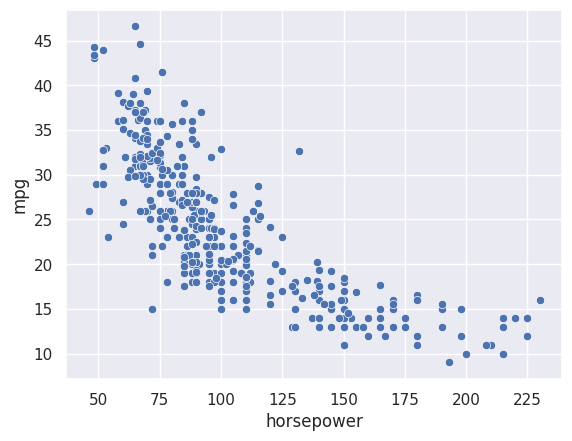

In [6]:
sns.set(style = "darkgrid")
sns.scatterplot(x = "horsepower",y = "mpg",data = mpg)


<Axes: xlabel='horsepower', ylabel='mpg'>

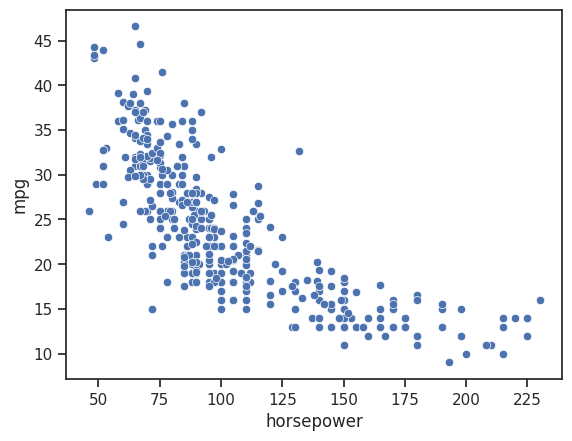

In [7]:
sns.set(style="ticks")
sns.scatterplot(x = "horsepower",y = "mpg",data = mpg)


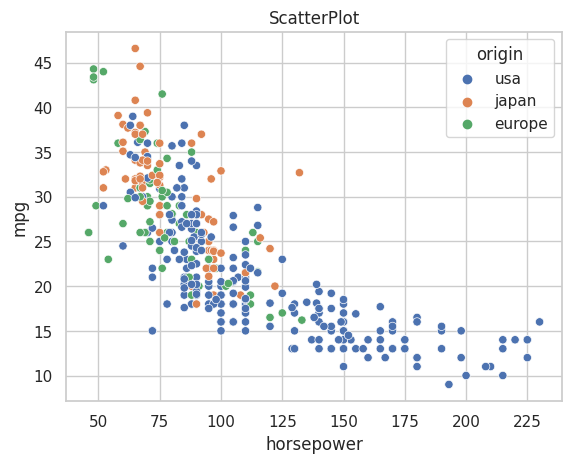

In [8]:
#different colored points for the different countries/origin
import matplotlib.pyplot as plt
sns.set(style = "whitegrid")
ax = sns.scatterplot(x = "horsepower",y = "mpg",data = mpg,hue = "origin")
ax.set_title("ScatterPlot")
plt.show()

Text(0.5, 1.0, 'ScatterPlot')

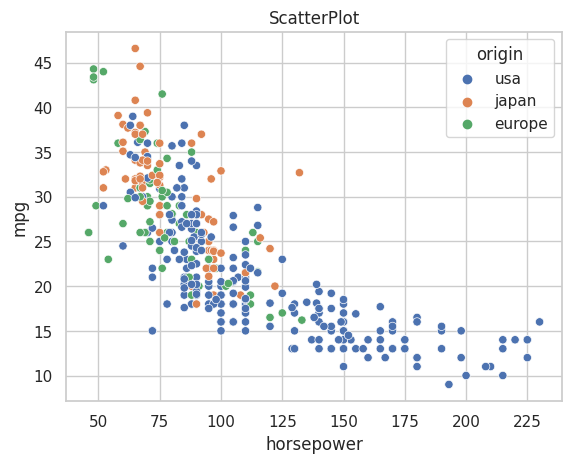

In [9]:
sns.set(style ="whitegrid")
sns.scatterplot(x ="horsepower",y= "mpg",data = mpg,hue = "origin").set_title("ScatterPlot")

<Axes: xlabel='horsepower', ylabel='mpg'>

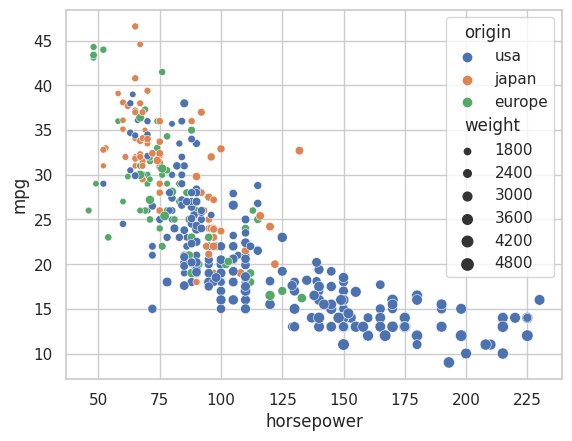

In [10]:
#size of the each point proportional to the weight of car
sns.set(style ="whitegrid")
sns.scatterplot(x = "horsepower",y = "mpg",data =mpg,hue = "origin",size = "weight")

<Axes: xlabel='horsepower', ylabel='mpg'>

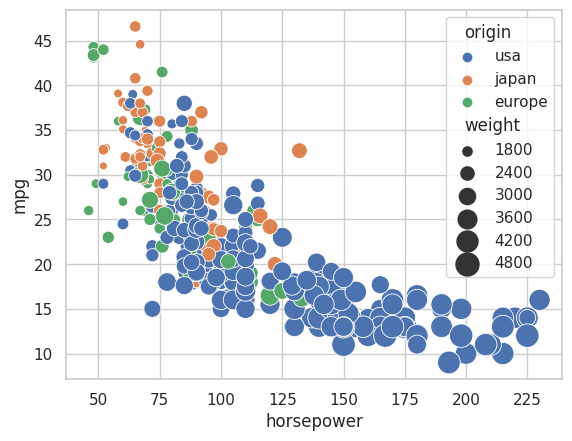

In [11]:
#custom sizes for each bubble
sns.set(style = "whitegrid")
sns.scatterplot(x = "horsepower",y = "mpg",data = mpg,hue = "origin",size = "weight",sizes= (30,300))

<Axes: xlabel='horsepower', ylabel='mpg'>

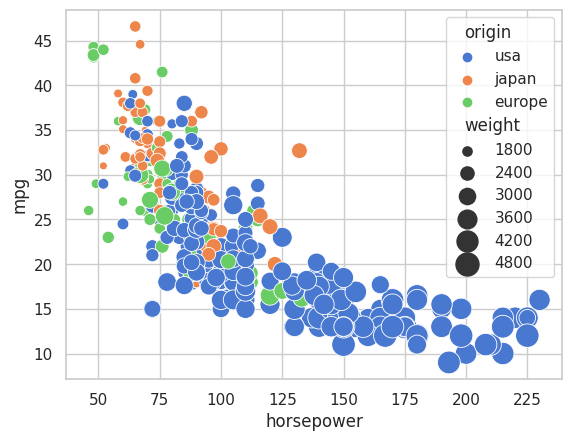

In [12]:
#palette
sns.set(style = "whitegrid")
sns.scatterplot(x = "horsepower",y ="mpg",data = mpg,hue = "origin",size = "weight",sizes = (30,300),palette = "muted")

In [13]:
# Common Options for palette:
# String (Named Palettes): You can use predefined color palettes from Seaborn or Matplotlib.

# "deep" (default), "muted", "bright", "pastel", "dark", "colorblind"
# List of Colors: Provide a list of colors (e.g., ["red", "blue", "green"]) for specific categories.

# Dictionary: Map specific colors to specific categories in the hue variable.

<Axes: xlabel='horsepower', ylabel='mpg'>

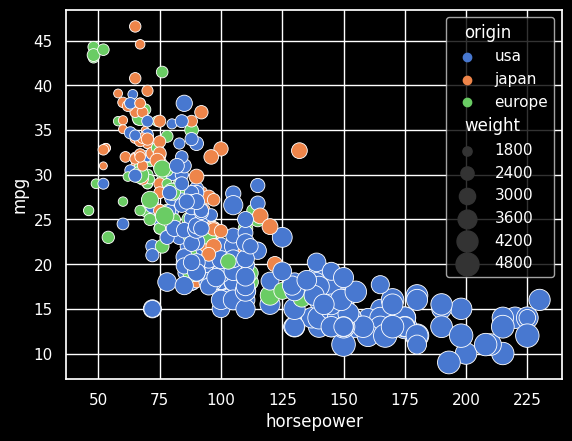

In [14]:
#i want the dark_background
sns.set(style = "whitegrid")
plt.style.use("dark_background")
sns.scatterplot(x = "horsepower",y = "mpg",data = mpg,hue = "origin",size = "weight",sizes = (30,300),palette = "muted")

**2. FacetGrid**

->multi-plot grid for plotting conditional relationship

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

tips= sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'seaborn.axisgrid.FacetGrid'>


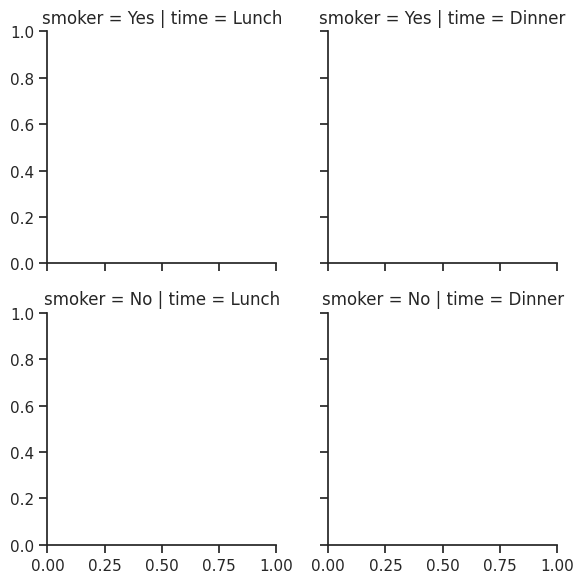

In [16]:
sns.set(style = "ticks",color_codes = True)
g = sns.FacetGrid(data= tips,col = "time",row = "smoker")
print(type(g))

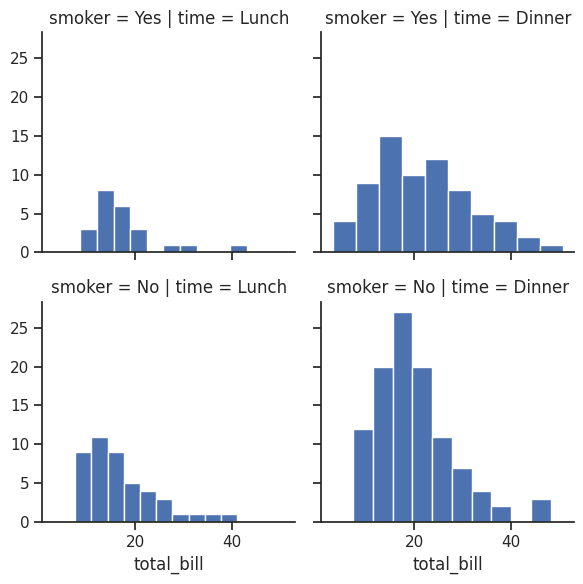

In [17]:
#Histogram representation
sns.set(style = "ticks",color_codes =True)
g = sns.FacetGrid(data= tips,col = "time",row = "smoker")
g.map(plt.hist,"total_bill")

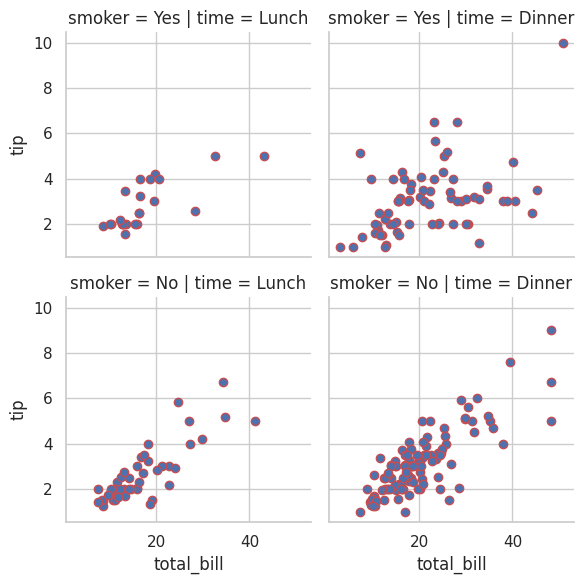

In [18]:
#Scatter plotting 
sns.set(style = "whitegrid",color_codes = True)
g = sns.FacetGrid(data= tips,col = "time",row= "smoker")
g.map(plt.scatter, "total_bill","tip",edgecolor = "r")

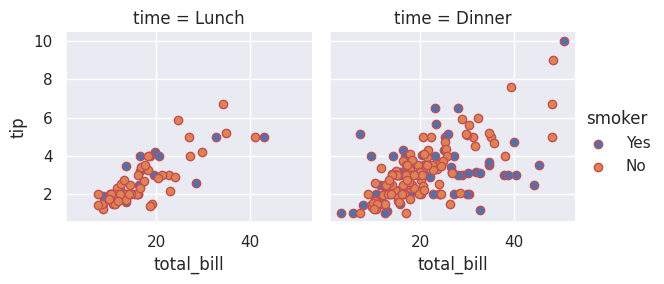

In [19]:
#adding legend()
sns.set(style ="darkgrid",color_codes =True)
# g = sns.FacetGrid(data = tips,col = "time",row = "smoker")
g =sns.FacetGrid(data = tips,col = "time",hue = "smoker")
gg =g.map(plt.scatter,"total_bill","tip",edgecolor = "r")
#print(type(gg))
gg.add_legend()

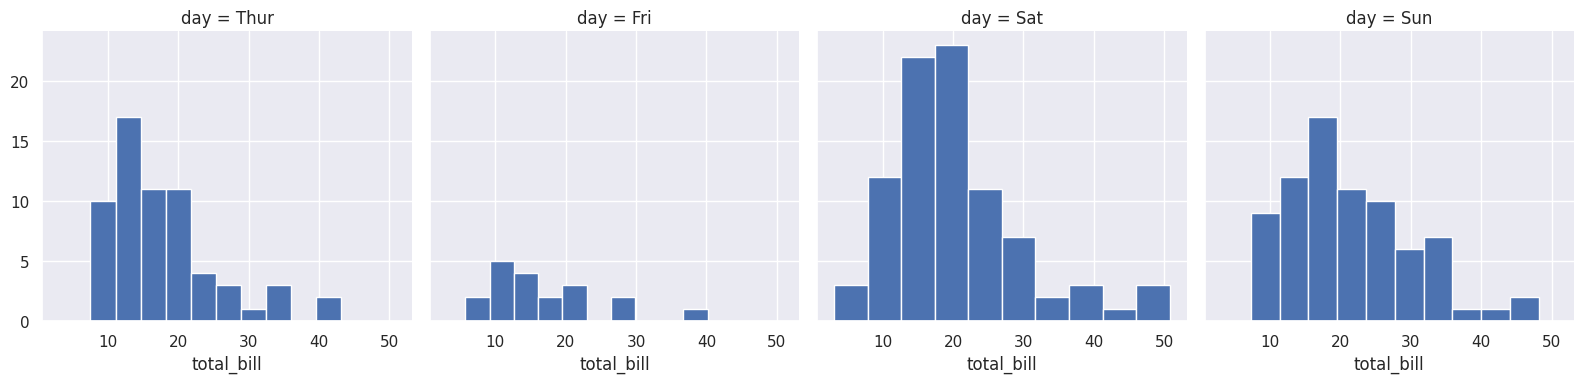

In [20]:
g =sns.FacetGrid(data = tips,col ="day",height = 4)
gg =g.map(plt.hist,"total_bill")

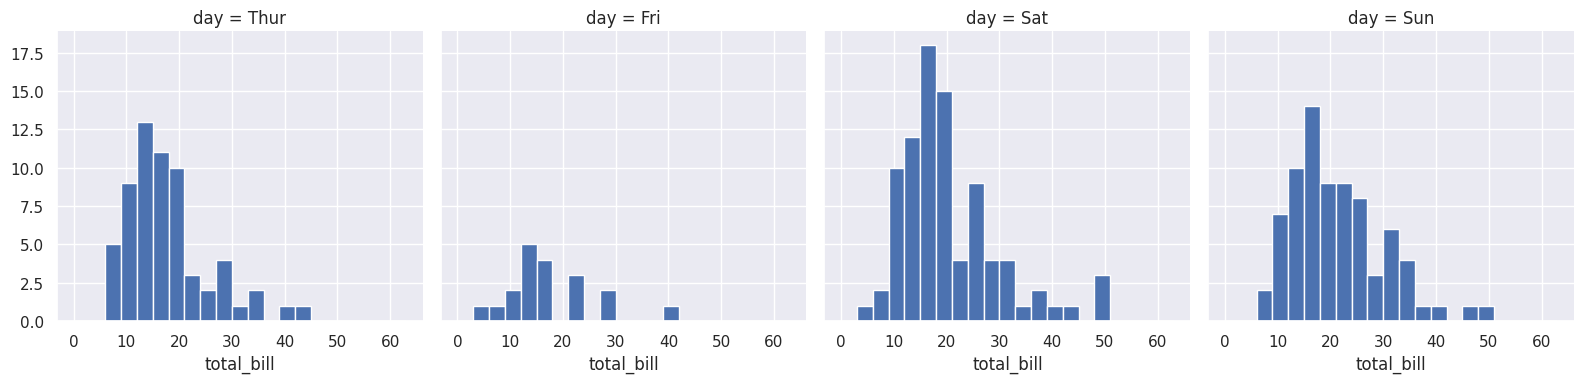

In [21]:
import numpy as np
bins = np.arange(0,65,3)
g = sns.FacetGrid(data = tips,col ="day",height = 4)
gg = g.map(plt.hist,"total_bill",bins = bins)

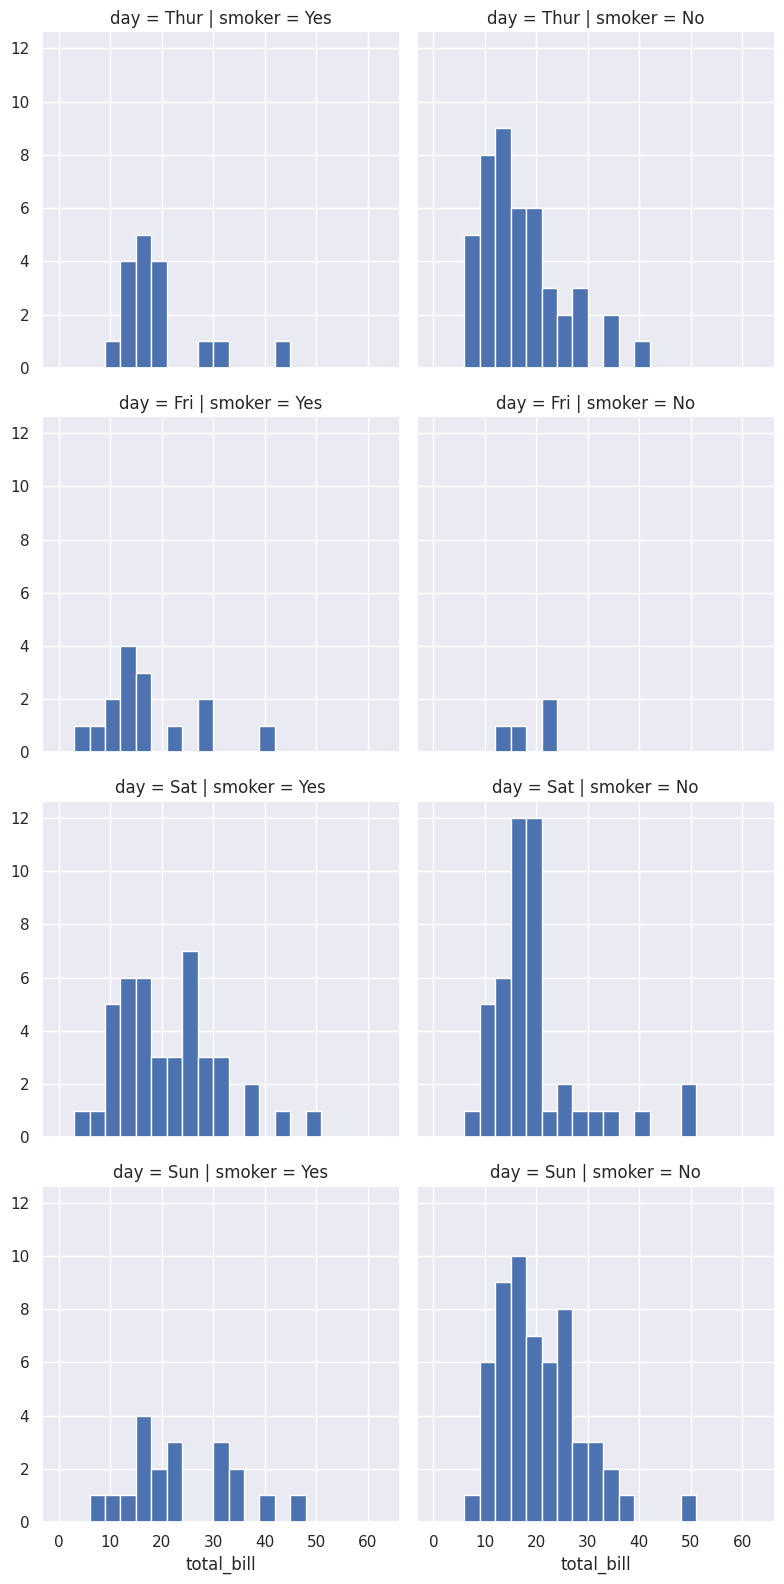

In [22]:
import numpy as np
bins = np.arange(0,65,3)
g =sns.FacetGrid(data=  tips,row = "day",col ="smoker",height = 4)
gg = g.map(plt.hist,"total_bill",bins = bins)


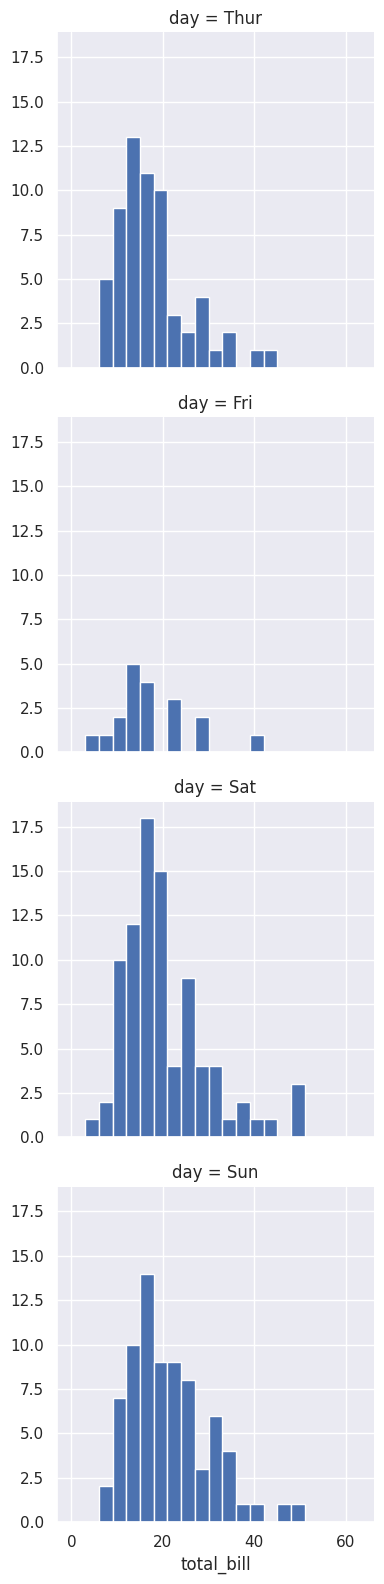

In [23]:
g = sns.FacetGrid(data = tips,row= "day",height = 4)
gg =g.map(plt.hist,"total_bill",bins = bins)

In [24]:
att = sns.load_dataset("attention")
att.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


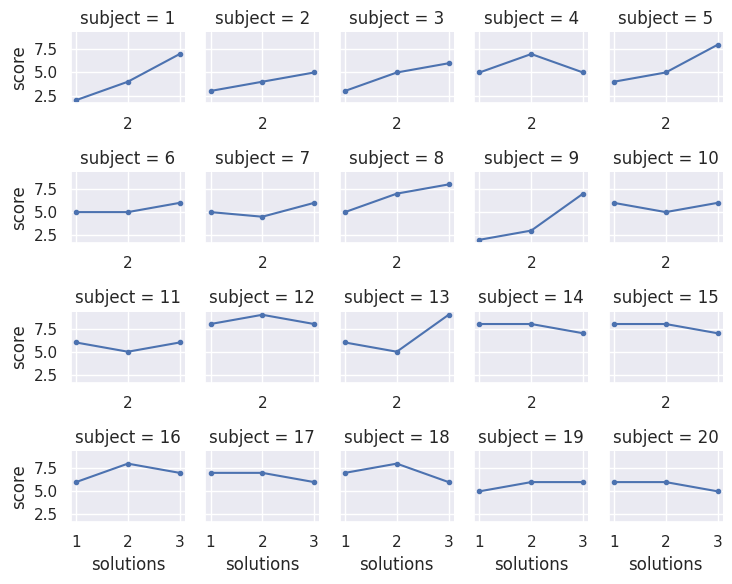

In [25]:
g= sns.FacetGrid(data = att,col = "subject",col_wrap =5,height= 1.5)
gg= g.map(plt.plot,"solutions","score",marker = ".")

**LinePlot**

In [26]:
#load an example dataset with long-form data
import tabulate as tabulate
from tabulate import tabulate
fmri = sns.load_dataset("fmri")
print(tabulate(fmri,headers = "keys",tablefmt = "github"))

|      | subject   |   timepoint | event   | region   |       signal |
|------|-----------|-------------|---------|----------|--------------|
|    0 | s13       |          18 | stim    | parietal | -0.0175516   |
|    1 | s5        |          14 | stim    | parietal | -0.0808829   |
|    2 | s12       |          18 | stim    | parietal | -0.081033    |
|    3 | s11       |          18 | stim    | parietal | -0.0461344   |
|    4 | s10       |          18 | stim    | parietal | -0.0379702   |
|    5 | s9        |          18 | stim    | parietal | -0.103513    |
|    6 | s8        |          18 | stim    | parietal | -0.0644082   |
|    7 | s7        |          18 | stim    | parietal | -0.0605262   |
|    8 | s6        |          18 | stim    | parietal | -0.00702856  |
|    9 | s5        |          18 | stim    | parietal | -0.0405569   |
|   10 | s4        |          18 | stim    | parietal | -0.0488122   |
|   11 | s3        |          18 | stim    | parietal | -0.0471481   |
|   12

In [27]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '95%_confidence_Interval or tube plot')

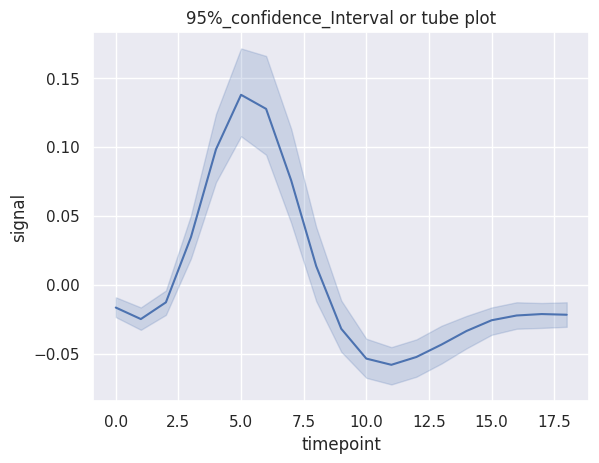

In [28]:
sns.lineplot(x = "timepoint",y = "signal",data = fmri).set_title("95%_confidence_Interval or tube plot")

In [29]:
np.mean(fmri[fmri["timepoint"]==5]["signal"])

0.13772540199215536

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timepoint', ylabel='signal'>

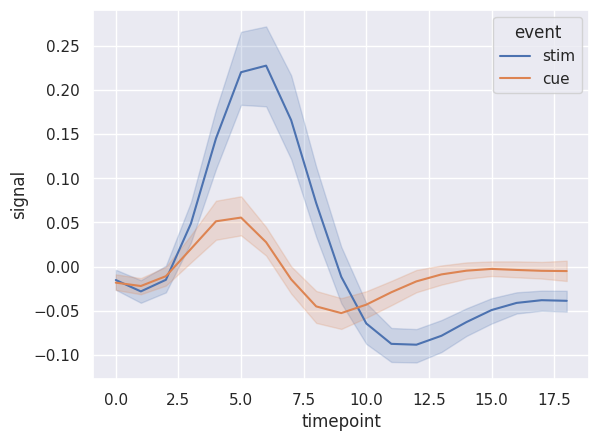

In [30]:
sns.lineplot(data = fmri,x = "timepoint",y ="signal",hue ="event")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


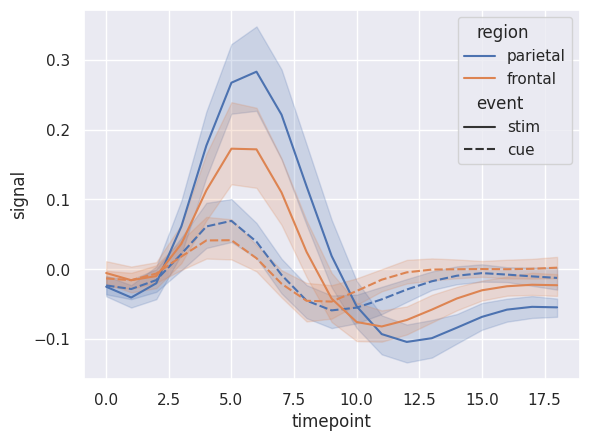

In [31]:
ax = sns.lineplot(x = "timepoint",y = "signal",hue = "region",style = "event",data = fmri)

|                     |         A |         B |
|---------------------|-----------|-----------|
| 2016-01-01 00:00:00 |  0.167921 |  0.523505 |
| 2016-01-02 00:00:00 |  0.817376 |  1.70385  |
| 2016-01-03 00:00:00 | -2.14695  |  0.714199 |
| 2016-01-04 00:00:00 | -0.760145 |  1.03942  |
| 2016-01-05 00:00:00 | -0.966452 | -0.143679 |


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


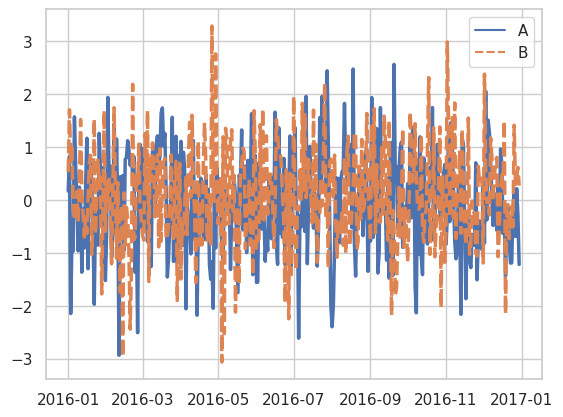

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Generate random data
rs = np.random.RandomState(365)
values = rs.randn(365, 2)  # This data is normally distributed
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B"])

# Print data in a tabular format
print(tabulate(data.head(), headers="keys", tablefmt="github"))

# Plot using sns.lineplot
sns.lineplot(data=data, linewidth=2.5)
plt.show()


**Distribution Plot**
1. distplot
2. kdeplot
3. jointplot
   

<ipython-input-33-74b826f396ee>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

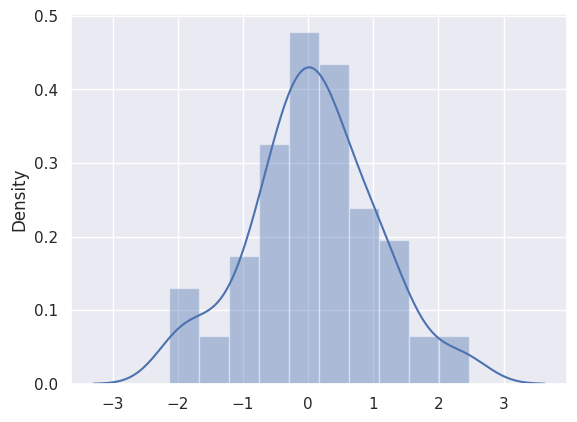

In [33]:
import numpy as np
import pandas as pd 
import seaborn as sns

sns.set(style = "darkgrid")
np.random.seed(10)
x = np.random.randn(100)
sns.distplot(x)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


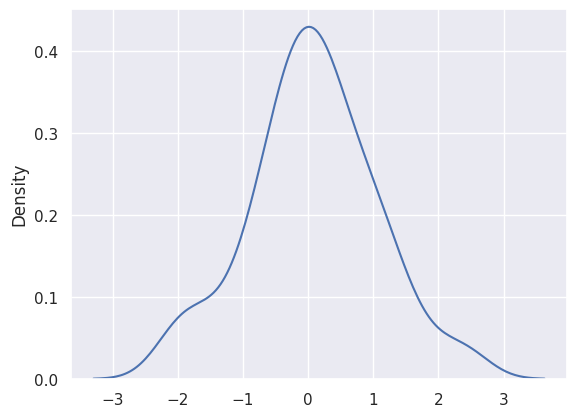

In [34]:
 np.random.seed(10)

x = np.random.randn(100)
ax = sns.kdeplot(x)

<ipython-input-35-91091b39ac88>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x,bw =1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

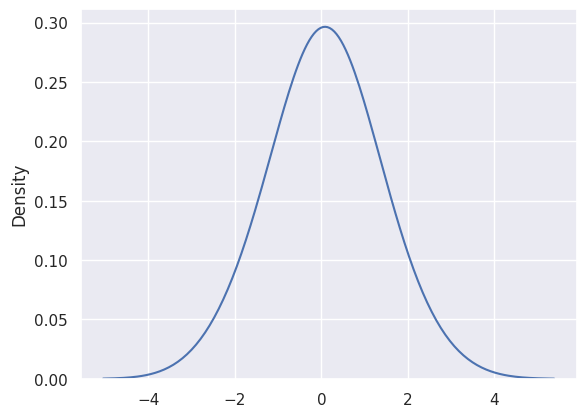

In [35]:
sns.kdeplot(x,bw =1)

Observation:
1. Mode the bandwidth more smooth curve
2. less the bandwidth less smooth curve 

<ipython-input-36-253d9d22c256>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x,bw =0.2)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

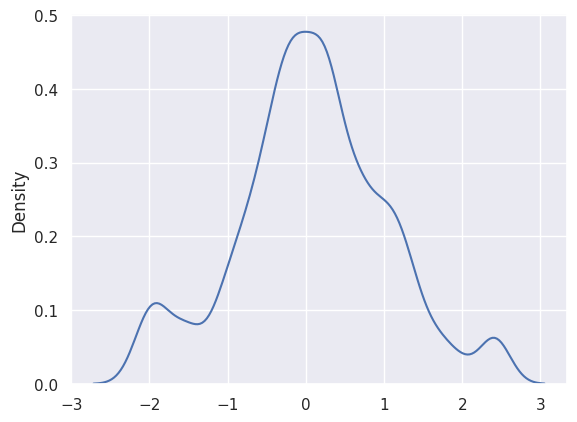

In [36]:
sns.kdeplot(x,bw =0.2)

<ipython-input-37-ad9438a98273>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.03`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(data = x,bw = 0.03)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

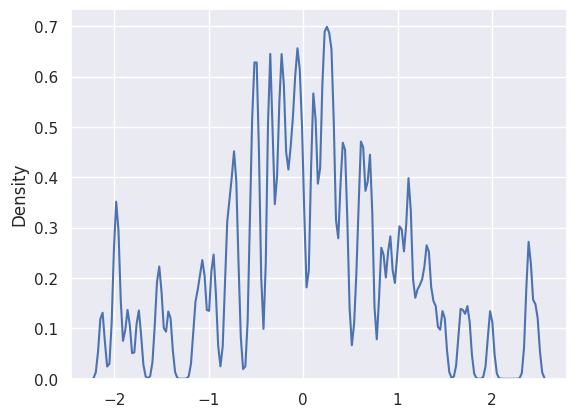

In [37]:
sns.kdeplot(data = x,bw = 0.03)

In [38]:
#Joint plot
sns.set(style = "white",color_codes = True)
tips =sns.load_dataset("tips")
print(tabulate(tips,headers = "keys",tablefmt = "github"))

|     |   total_bill |   tip | sex    | smoker   | day   | time   |   size |
|-----|--------------|-------|--------|----------|-------|--------|--------|
|   0 |        16.99 |  1.01 | Female | No       | Sun   | Dinner |      2 |
|   1 |        10.34 |  1.66 | Male   | No       | Sun   | Dinner |      3 |
|   2 |        21.01 |  3.5  | Male   | No       | Sun   | Dinner |      3 |
|   3 |        23.68 |  3.31 | Male   | No       | Sun   | Dinner |      2 |
|   4 |        24.59 |  3.61 | Female | No       | Sun   | Dinner |      4 |
|   5 |        25.29 |  4.71 | Male   | No       | Sun   | Dinner |      4 |
|   6 |         8.77 |  2    | Male   | No       | Sun   | Dinner |      2 |
|   7 |        26.88 |  3.12 | Male   | No       | Sun   | Dinner |      4 |
|   8 |        15.04 |  1.96 | Male   | No       | Sun   | Dinner |      2 |
|   9 |        14.78 |  3.23 | Male   | No       | Sun   | Dinner |      2 |
|  10 |        10.27 |  1.71 | Male   | No       | Sun   | Dinner |      2 |

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


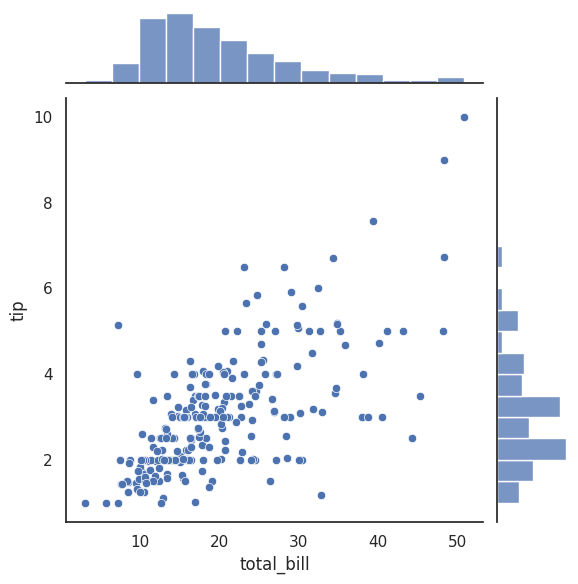

In [39]:
g = sns.jointplot(x = "total_bill",y = "tip",data = tips)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

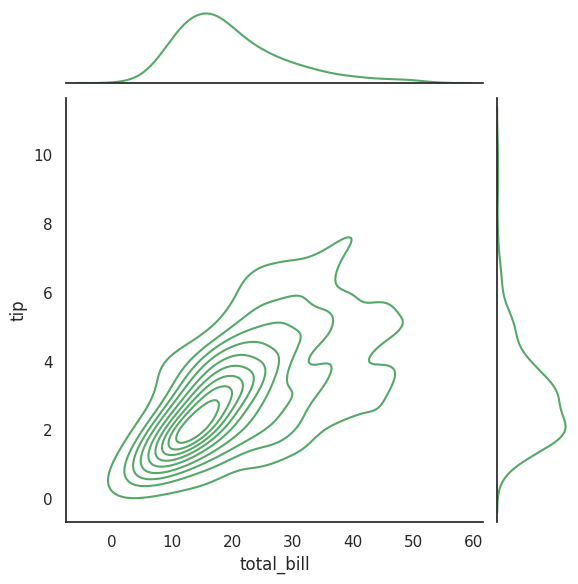

In [40]:
# sns.set(style = "",color_codes = True)
g =sns.jointplot(x = "total_bill",y ="tip",data = tips,kind ="kde",color = "g")